In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import re
from sklearn.model_selection import train_test_split

In [ ]:
df_train = pd.read_csv("./train.csv")

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Lets learn the different types of data available:

In [ ]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

## Time to Visualize the dataset

Text(0.5, 1.0, 'Ratio of the classes')

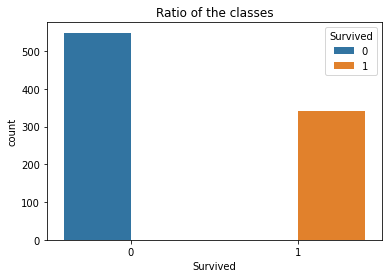

In [ ]:
# Checking the ratio 
sb.countplot(data=df_train,x="Survived",hue="Survived")
plt.title("Ratio of the classes")

## Checking the relationship of each feature against the class labels

- This will help us judge the importance of features

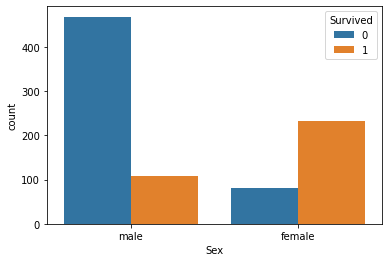

In [ ]:
#Checking the "Sex" feature and the corresponding Survival rate
sb.countplot(x="Sex",data=df_train,hue="Survived")

### What conclusions can we draw from this?

- I can conclude that most females and young children survived while most males did not
- PClass also had a huge effect on survival (first class mostly survived as opposed to third class)
- Age and PClass may be correlated
- Higher fare, better chance of survival

Story:
- looking at the dataset, we can clearly see that female and children were prioritised for lifeboats
- People in the higher classes had a better chance of survival

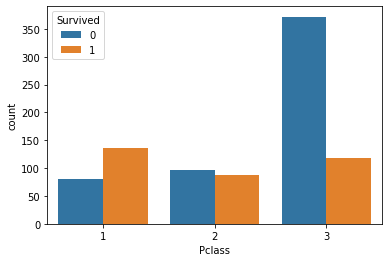

In [ ]:
#Checking the "Pclass" feature and the corresponding Survival rate
sb.countplot(x="Pclass",data=df_train,hue="Survived")

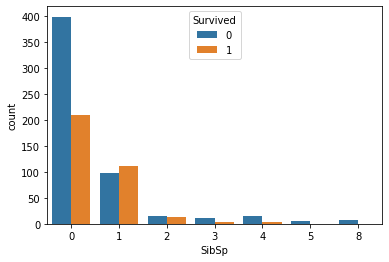

In [ ]:
#Checking the "Siblings" feature and the corresponding Survival rate
sb.countplot(x="SibSp",data=df_train,hue="Survived")

In [ ]:
df_train['Titles'] = df_train['Name'].apply(lambda x: re.findall('[A-Za-z]+\.',x)[0])

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,Titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,Mr.


In [ ]:
pd.get_dummies(df_train['Titles'])

,Capt.,Col.,Countess.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
887,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
#But what is Pclass?
df_train.groupby(by = "Pclass")['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

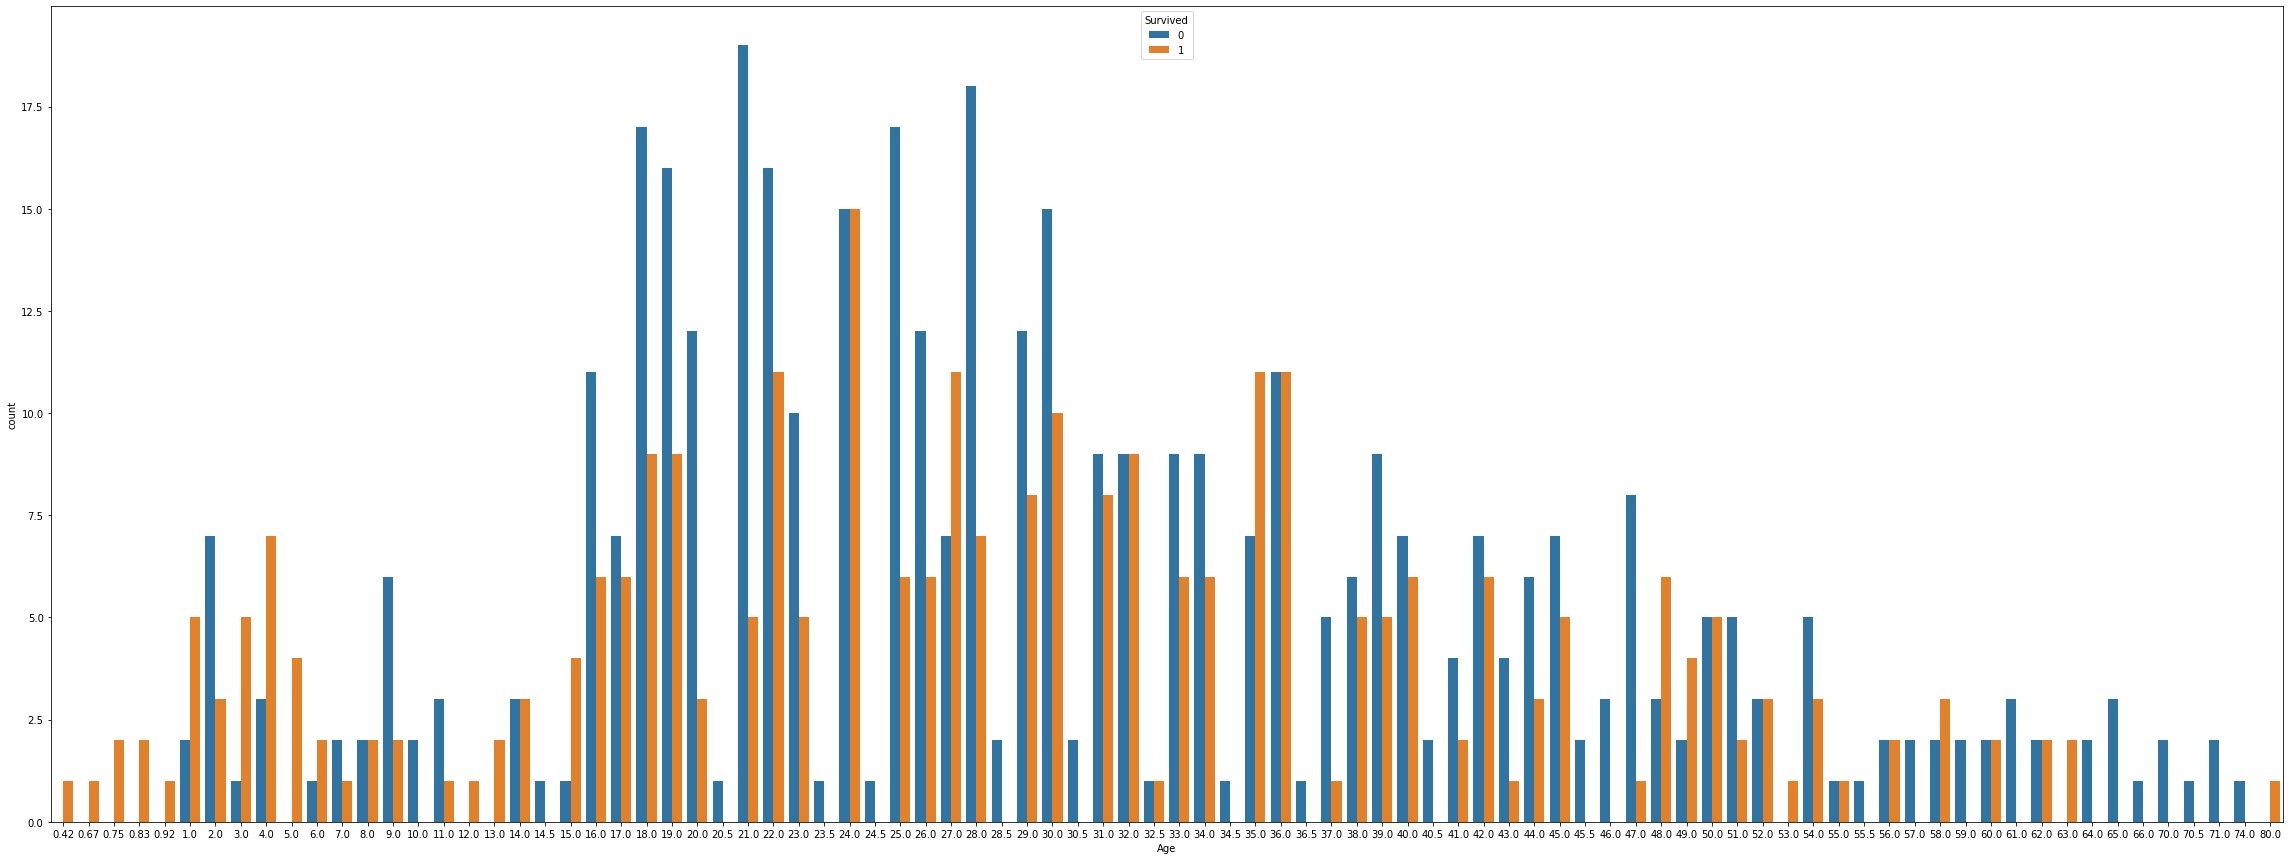

In [ ]:
#Checking the "Age" feature and the corresponding Survival rate
plt.figure(figsize=(40,15))
sb.countplot(x="Age",data=df_train,hue="Survived")

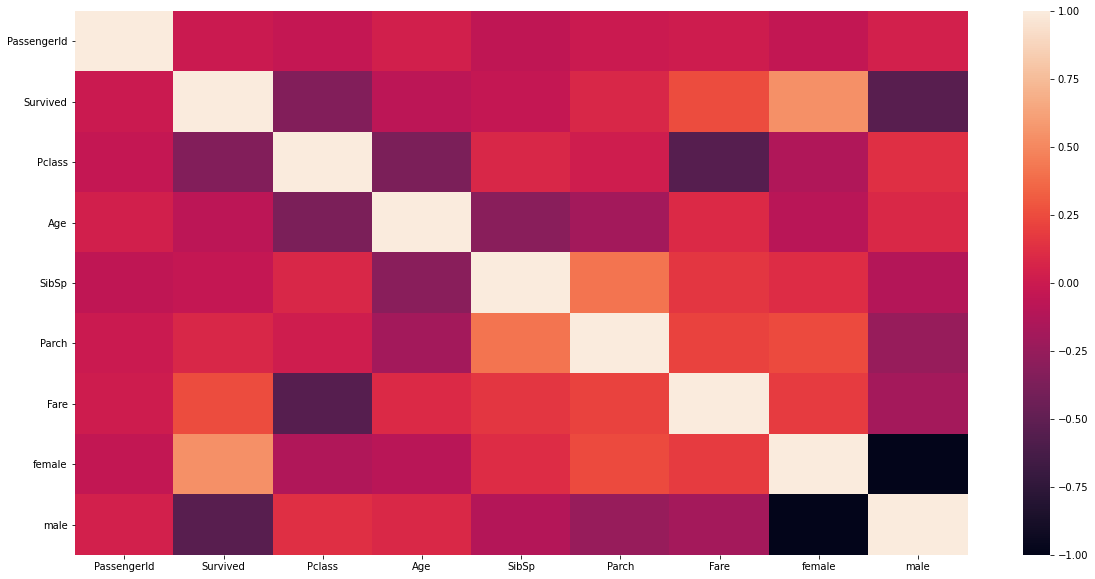

In [ ]:
plt.figure(figsize=(20,10))
sb.heatmap(df_train.corr())

### Create your new features

In [ ]:
df_train[['female','male']] = pd.get_dummies(df_train['Sex'])

In [ ]:
df_train[["C","Q","S"]] = pd.get_dummies(df_train['Embarked'])

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,Titles,S,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,Mr.,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Mrs.,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,Miss.,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Mrs.,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,Mr.,1,0,0


In [ ]:
#Drop the irrelevant features
drop_features = ['PassengerId','Titles','Ticket','Name','Cabin',"Embarked"]
df_train.drop(drop_features,inplace=True,axis=1)
df_train.drop('Sex',axis=1,inplace=True)

In [ ]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,S,C,Q
0,0,3,22.0,1,0,7.2500,0,1,1,0,0
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,1,0,1,0,0
3,1,1,35.0,1,0,53.1000,1,0,1,0,0
4,0,3,35.0,0,0,8.0500,0,1,1,0,0


<h2> Dealing with Missing Values </h2>

In [ ]:
df_train.fillna(method="backfill",inplace=True)

In [ ]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(df_train.loc[:,'Pclass':],df_train.Survived,\
                                                          test_size=0.1) # Splitting the data into train and test

In [ ]:
y_train_2

78     1
226    1
284    0
779    1
710    1
      ..
544    0
148    0
834    0
93     0
523    1
Name: Survived, Length: 801, dtype: int64

In [ ]:
titanic_model_v1 = LogisticRegression()
titanic_model_v1.fit(x_train_2,y_train_2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predictions = titanic_model_v1.predict(x_test_2)

In [ ]:
print(classification_report(y_test_2,y_predictions))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82        53
           1       0.79      0.62      0.70        37

    accuracy                           0.78        90
   macro avg       0.78      0.75      0.76        90
weighted avg       0.78      0.78      0.77        90



In [ ]:
df_test = pd.read_csv("./test.csv")

In [ ]:
df_test[['female','male']] = pd.get_dummies(df_test['Sex'])
df_test[["C","Q","S"]] = pd.get_dummies(df_test['Embarked'])
df_test['Titles'] = df_test['Name'].apply(lambda x: re.findall('[A-Za-z]+\.',x)[0])
df_test.fillna(method="ffill",inplace=True)
drop_features = ['Sex','Titles','Ticket','Name','Cabin',"Embarked"]
df_test.drop(drop_features,inplace=True,axis=1)

In [ ]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
female         0
male           0
C              0
Q              0
S              0
dtype: int64

In [ ]:
predictions_for_submission = titanic_model_v1.predict(df_test.loc[:,"Pclass":])

In [ ]:
df_submission = df_test[['PassengerId']].copy()

In [ ]:
df_submission['Survived'] = predictions_for_submission

In [ ]:
df_submission.to_csv("submission_v1.csv")

In [ ]:
pd.read_csv("./gender_submission.csv")

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Advanced Feature Engineering Techniques

- Here we will discover techniques such as PCA, RFE and SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
SelectKBest(chi2, k=5).fit_transform(x_train_2,y_train_2)

array([[ 2.    , 29.    ,  0.    ,  1.    ,  0.    ],
       [ 2.    , 10.5   ,  0.    ,  1.    ,  0.    ],
       [ 1.    , 26.    ,  0.    ,  1.    ,  0.    ],
       ...,
       [ 3.    ,  8.3   ,  0.    ,  1.    ,  0.    ],
       [ 3.    , 20.575 ,  0.    ,  1.    ,  0.    ],
       [ 1.    , 57.9792,  1.    ,  0.    ,  1.    ]])

In [ ]:
df_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,28.0,0,0,8.0500,0,1,0,0,1
414,1306,1,39.0,0,0,108.9000,1,0,1,0,0
415,1307,3,38.5,0,0,7.2500,0,1,0,0,1
416,1308,3,38.5,0,0,8.0500,0,1,0,0,1
